# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [1]:
# import libraries
import nltk
nltk.download(['punkt', 'wordnet'])

import re
import pickle
import pandas as pd
from sqlalchemy import create_engine
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jonas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jonas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# load data from database
engine = create_engine('sqlite:///DisasterResponse.db')
df = pd.read_sql_table('disaster_respond', engine)
X = df['message']
Y = df.drop(['id', 'message', 'genre', 'original'], axis=1)

In [3]:
X.head()

0    Weather update - a cold front from Cuba that c...
1              Is the Hurricane over or is it not over
2                      Looking for someone but no name
3    UN reports Leogane 80-90 destroyed. Only Hospi...
4    says: west side of Haiti, rest of the country ...
Name: message, dtype: object

In [4]:
Y.head()

,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2. Write a tokenization function to process your text data

In [5]:
url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

def tokenize(text):
    detected_urls = re.findall(url_regex, text)
    for url in detected_urls:
        text = text.replace(url, "urlplaceholder")
        
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    
    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)
    
    return clean_tokens

In [73]:
sum_list = []
for i in range(len(Y)):
    sum_list.append(Y.iloc[i].sum())
print('average number of categories: {}'.format(sum(sum_list)/len(sum_list)))
print('highest number of categories: {}'.format(max(sum_list)))

average number of categories: 3.178326212999695
highest number of categories: 27


In [74]:
np.unique(sum_list)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 24, 27], dtype=int64)

In [78]:
len(sum_list)

26216

(array([6.122e+03, 5.121e+03, 6.310e+02, 3.609e+03, 2.276e+03, 2.956e+03,
        1.903e+03, 1.347e+03, 8.800e+02, 5.770e+02, 3.440e+02, 1.830e+02,
        1.070e+02, 5.700e+01, 3.800e+01, 2.000e+01, 8.000e+00, 1.200e+01,
        7.000e+00, 5.000e+00, 4.000e+00, 4.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <BarContainer object of 26 artists>)

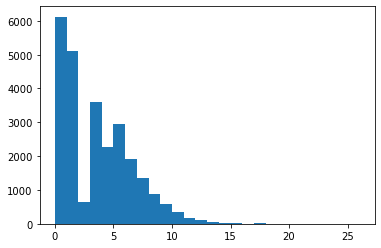

In [76]:
from matplotlib import pyplot as plt
plt.hist(sum_list, bins=np.arange(0, 27, 1))

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [6]:
pipeline = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultiOutputClassifier(RandomForestClassifier()))
])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

model = pipeline
model.fit(X_train, Y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function tokenize at 0x000001BC6DF19E50>)),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 MultiOutputClassifier(estimator=RandomForestClassifier()))])

In [17]:
Y0_pred = model.predict(X_test)

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [26]:
i = 0
for col in Y_test:
    print('Feature {}: {}'.format(i + 1, col))
    print(classification_report(Y_test[col], Y0_pred[:, i]))
    i = i + 1
accuracy = (Y0_pred == Y_test.values).mean()
print('The model accuracy is {:.3f}'.format(accuracy))

Feature 1: related-1
              precision    recall  f1-score   support

           0       0.76      0.26      0.38      1551
           1       0.80      0.97      0.88      4961
           2       0.50      0.12      0.19        42

    accuracy                           0.80      6554
   macro avg       0.69      0.45      0.48      6554
weighted avg       0.79      0.80      0.76      6554

Feature 2: request-0
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5506
           1       0.86      0.45      0.59      1048

    accuracy                           0.90      6554
   macro avg       0.88      0.72      0.77      6554
weighted avg       0.90      0.90      0.89      6554

Feature 3: offer-0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6522
           1       0.00      0.00      0.00        32

    accuracy                           1.00      6554
   macro avg 

C:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      6133
           1       0.88      0.26      0.40       421

    accuracy                           0.95      6554
   macro avg       0.91      0.63      0.69      6554
weighted avg       0.95      0.95      0.94      6554

Feature 12: food-0
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      5831
           1       0.87      0.47      0.61       723

    accuracy                           0.93      6554
   macro avg       0.90      0.73      0.79      6554
weighted avg       0.93      0.93      0.92      6554

Feature 13: shelter-0
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5990
           1       0.83      0.26      0.40       564

    accuracy                           0.93      6554
   macro avg       0.88      0.63      0.68      6554
weighted avg       0.93      0.93

C:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonas\anaconda3\lib\site-packages\sklearn\metr

### 6. Improve your model
Use grid search to find better parameters. 

In [19]:
model.get_params()

{'memory': None,
 'steps': [('vect',
   CountVectorizer(tokenizer=<function tokenize at 0x000001BC6DF19E50>)),
  ('tfidf', TfidfTransformer()),
  ('clf', MultiOutputClassifier(estimator=RandomForestClassifier()))],
 'verbose': False,
 'vect': CountVectorizer(tokenizer=<function tokenize at 0x000001BC6DF19E50>),
 'tfidf': TfidfTransformer(),
 'clf': MultiOutputClassifier(estimator=RandomForestClassifier()),
 'vect__analyzer': 'word',
 'vect__binary': False,
 'vect__decode_error': 'strict',
 'vect__dtype': numpy.int64,
 'vect__encoding': 'utf-8',
 'vect__input': 'content',
 'vect__lowercase': True,
 'vect__max_df': 1.0,
 'vect__max_features': None,
 'vect__min_df': 1,
 'vect__ngram_range': (1, 1),
 'vect__preprocessor': None,
 'vect__stop_words': None,
 'vect__strip_accents': None,
 'vect__token_pattern': '(?u)\\b\\w\\w+\\b',
 'vect__tokenizer': <function __main__.tokenize(text)>,
 'vect__vocabulary': None,
 'tfidf__norm': 'l2',
 'tfidf__smooth_idf': True,
 'tfidf__sublinear_tf': False,


In [20]:
parameters = {
    'vect__max_features': (None, 5000),
    'tfidf__use_idf': (True, False),
    'clf__estimator__n_estimators': [50, 100],
    'clf__estimator__min_samples_split': [2, 3],
}

cv = GridSearchCV(pipeline, param_grid=parameters, n_jobs=-1)

In [21]:
cv.fit(X_train, Y_train)

GridSearchCV(estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(tokenizer=<function tokenize at 0x000001BC6DF19E50>)),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf',
                                        MultiOutputClassifier(estimator=RandomForestClassifier()))]),
             param_grid={'clf__estimator__min_samples_split': [2, 3],
                         'clf__estimator__n_estimators': [50, 100],
                         'tfidf__use_idf': (True, False),
                         'vect__max_features': (None, 5000)})

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [23]:
Y_pred = cv.predict(X_test)
i = 0
for col in Y_test:
    print('Feature {}: {}'.format(i + 1, col))
    print(classification_report(Y_test[col], Y_pred[:, i]))
    i = i + 1
accuracy = (Y_pred == Y_test.values).mean()
print('The model accuracy is {:.3f}'.format(accuracy))

Feature 1: related-1
              precision    recall  f1-score   support

           0       0.72      0.28      0.40      1551
           1       0.81      0.96      0.88      4961
           2       0.44      0.29      0.35        42

    accuracy                           0.80      6554
   macro avg       0.66      0.51      0.54      6554
weighted avg       0.78      0.80      0.76      6554

Feature 2: request-0
              precision    recall  f1-score   support

           0       0.91      0.99      0.94      5506
           1       0.86      0.47      0.61      1048

    accuracy                           0.90      6554
   macro avg       0.88      0.73      0.78      6554
weighted avg       0.90      0.90      0.89      6554

Feature 3: offer-0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6522
           1       0.00      0.00      0.00        32

    accuracy                           1.00      6554
   macro avg 

C:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jonas\anaconda3\lib\site-packages\sklearn\metr

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6530
           1       0.00      0.00      0.00        24

    accuracy                           1.00      6554
   macro avg       0.50      0.50      0.50      6554
weighted avg       0.99      1.00      0.99      6554

Feature 27: aid_centers-0
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6464
           1       0.00      0.00      0.00        90

    accuracy                           0.99      6554
   macro avg       0.49      0.50      0.50      6554
weighted avg       0.97      0.99      0.98      6554

Feature 28: other_infrastructure-0
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6263
           1       0.00      0.00      0.00       291

    accuracy                           0.95      6554
   macro avg       0.48      0.50      0.49      6554
weighted avg 

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

### 9. Export your model as a pickle file

In [25]:
with open('classifer.pkl', 'wb') as f:
    pickle.dump(cv, f)

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.